In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import datetime
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [3]:
head_temp = cv2.imread('./template/head.jpg')
head_temp = cv2.cvtColor(head_temp, cv2.COLOR_BGR2RGB)

in_process_title_temp = cv2.imread('./template/in_process_title.jpg')
in_process_title_temp = cv2.cvtColor(in_process_title_temp, cv2.COLOR_BGR2RGB)

complete_title_temp = cv2.imread('./template/complete_title.jpg')
complete_title_temp = cv2.cvtColor(complete_title_temp, cv2.COLOR_BGR2RGB)

footer_temp = cv2.imread('./template/footer.jpg')
footer_temp = cv2.cvtColor(footer_temp, cv2.COLOR_BGR2RGB)


In [ ]:
today_str = datetime.datetime.today().strftime('%Y-%m-%d')
tomorrow_str = (datetime.datetime.today()+datetime.timedelta(days=1)).strftime('%Y-%m-%d')
today_str, tomorrow_str

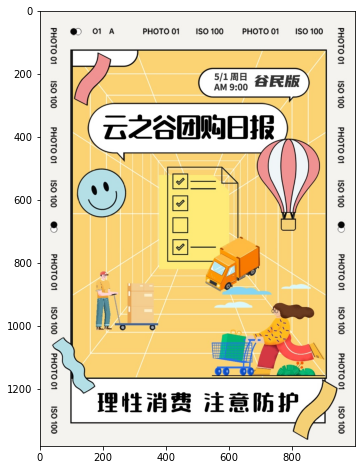

In [15]:

plt.figure(figsize=(8,8))
plt.imshow(head_temp)

In [5]:
df = pd.read_excel(r"C:\Users\k-2fe\OneDrive\天空之城团购\天空之城 - 云之谷 团购更新_(1-7).xlsx")
df

,ID,开始时间,完成时间,电子邮件,名称,团购内容,开团日期,到货时间,目前状态,平台,团长
0,2,2022-04-30 17:26:32,2022-04-30 17:26:51,anonymous,NaN,面包,2022-04-29,NaN,未成团,拼多多,大猫
1,3,2022-04-30 17:31:12,2022-04-30 17:32:31,anonymous,NaN,零食超市团,2022-04-30,NaN,未成团,快团团,bobo
2,4,2022-04-30 17:32:34,2022-04-30 17:33:19,anonymous,NaN,捞王火锅,2022-04-28,NaN,未成团,快团团,bobo
3,5,2022-04-30 17:34:27,2022-04-30 17:35:21,anonymous,NaN,烧腊复团,2022-05-01,NaN,未成团,快团团,bobo
4,6,2022-04-30 17:58:44,2022-04-30 17:59:07,anonymous,NaN,饺子,2022-04-28,NaN,已成团,拼多多,大猫
5,7,2022-05-01 00:11:27,2022-05-01 00:11:46,anonymous,NaN,面包,2022-05-01,成团3天后,未成团,拼多多,大猫
6,8,2022-05-01 00:13:19,2022-05-01 00:13:52,anonymous,NaN,乌江榨菜70克,2022-05-01,5/2,未成团,快团团,林小宣
7,9,2022-05-01 00:39:01,2022-05-01 00:39:33,anonymous,NaN,南汇玉菇甜瓜,2022-05-01,5.2,已成团,拼多多,蘑菇🍄
8,10,2022-05-01 13:52:59,2022-05-01 13:55:01,anonymous,NaN,榴莲肉/水果玉米/水仙芒/玲珑果/伦晚橙/佳沛金果,2022-04-30,5/1,已成团,快团团,林老师
9,11,2022-05-01 14:08:37,2022-05-01 14:09:12,anonymous,NaN,山姆团购第二波,2022-05-01,2022/5/4,已截团,快团团,佟小君


('2022-05-01', '2022-05-02')

In [7]:
df = df[(df['开始时间'] >= today_str) & (df['开始时间'] < tomorrow_str)]
df

,ID,开始时间,完成时间,电子邮件,名称,团购内容,开团日期,到货时间,目前状态,平台,团长
5,7,2022-05-01 00:11:27,2022-05-01 00:11:46,anonymous,NaN,面包,2022-05-01,成团3天后,未成团,拼多多,大猫
6,8,2022-05-01 00:13:19,2022-05-01 00:13:52,anonymous,NaN,乌江榨菜70克,2022-05-01,5/2,未成团,快团团,林小宣
7,9,2022-05-01 00:39:01,2022-05-01 00:39:33,anonymous,NaN,南汇玉菇甜瓜,2022-05-01,5.2,已成团,拼多多,蘑菇🍄
8,10,2022-05-01 13:52:59,2022-05-01 13:55:01,anonymous,NaN,榴莲肉/水果玉米/水仙芒/玲珑果/伦晚橙/佳沛金果,2022-04-30,5/1,已成团,快团团,林老师
9,11,2022-05-01 14:08:37,2022-05-01 14:09:12,anonymous,NaN,山姆团购第二波,2022-05-01,2022/5/4,已截团,快团团,佟小君
10,12,2022-05-01 14:09:21,2022-05-01 14:11:45,anonymous,NaN,泰國開口香椰！9颗装！,2022-05-01,成团隔日,未成团,快团团,REK
11,13,2022-05-01 16:20:07,2022-05-01 16:21:42,anonymous,NaN,黄天鹅生食级鸡蛋团,2022-05-01,成团隔日,未成团,快团团,REK


In [8]:
in_process_df = df[df["目前状态"].isin(["待开团", "未成团","已成团"])][["团购内容","团长","到货时间","目前状态"]]
in_process_df

,团购内容,团长,到货时间,目前状态
5,面包,大猫,成团3天后,未成团
6,乌江榨菜70克,林小宣,5/2,未成团
7,南汇玉菇甜瓜,蘑菇🍄,5.2,已成团
8,榴莲肉/水果玉米/水仙芒/玲珑果/伦晚橙/佳沛金果,林老师,5/1,已成团
10,泰國開口香椰！9颗装！,REK,成团隔日,未成团
11,黄天鹅生食级鸡蛋团,REK,成团隔日,未成团


In [9]:


def chunkstring(string, length):
    return (string[0+i:length+i] for i in range(0, len(string), length))

def cv2ImgAddText(img, text, left, top, textColor=(0, 0, 0), textSize=20):

    if (isinstance(img, np.ndarray)):  #判断是否OpenCV图片类型

        img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    draw = ImageDraw.Draw(img)

    fontText = ImageFont.truetype(

        "font/simsun.ttc", textSize, encoding="utf-8")

    draw.text((left, top), text, textColor, font=fontText)

    return cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

def row_img(row):
    max_cell_length = 7
    text_row_height = 50

    content = row["团购内容"]
    name = row["团长"]
    eta = row["到货时间"]
    status = row["目前状态"]
    content_split = list(chunkstring(content, max_cell_length))
    max_lengh = max([len(str(v)) for v in row.values])
    #print(max_lengh)
    
    max_row_height = (max_lengh-1)//max_cell_length+1
    print(max_row_height)

    img_height = text_row_height * max_row_height + 20
    img_width = 1000
    canvas = np.ones((img_height, img_width, 3), dtype="uint8")
    canvas[:] = (244, 243, 239)
    font_bg_color = (255, 255, 251)
    # plt.imshow(canvas)
    plt.figure(figsize=(10,5))
    line_padding = 73
    # Draw two vertical border
    canvas = cv2.line(canvas,(line_padding,0),(line_padding,img_height),color = (0, 0, 0),thickness=2)
    canvas = cv2.line(canvas,(img_width-line_padding,0),(img_width-line_padding,img_height),color = (0, 0, 0),thickness=2)
    # Draw underline for each row
    canvas = cv2.line(canvas,(133,img_height-10),(860,img_height-10),color = (0, 0, 0),thickness=1)
    # Fill text
    textSize = 28
    canvas = cv2ImgAddText(canvas, content_split[0], 150, 10, textSize=textSize)
    canvas = cv2ImgAddText(canvas, name, 380, 10, textSize=textSize)
    canvas = cv2ImgAddText(canvas, eta, 510, 10, textSize=textSize)
    canvas = cv2ImgAddText(canvas, status, 740, 10, textSize=textSize)

    for i in range(1,len(content_split)):
        canvas = cv2ImgAddText(canvas, content_split[i], 150, 10+i*text_row_height, textSize=textSize)

    # plt.imshow(canvas)
    return canvas


In [10]:
list(chunkstring("哈哈哈, 喵", 7))

['哈哈哈, 喵']

1
1
1
4
2
2


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

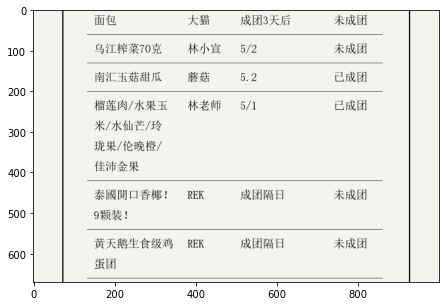

In [11]:
row_img_list = []
for index, row in in_process_df.iterrows():
    row_img_list.append(row_img(row=row))
in_process_img = cv2.vconcat(row_img_list)
plt.imshow(in_process_img)


2


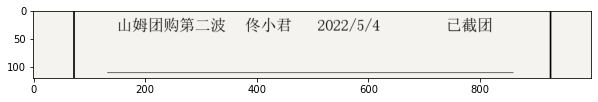

In [12]:
complete_df = df[df["目前状态"].isin(["已截团"])][["团购内容","团长","到货时间","目前状态"]]
row_img_list = []
for index, row in complete_df.iterrows():
    row_img_list.append(row_img(row=row))
complete_img = cv2.vconcat(row_img_list)
plt.imshow(complete_img)

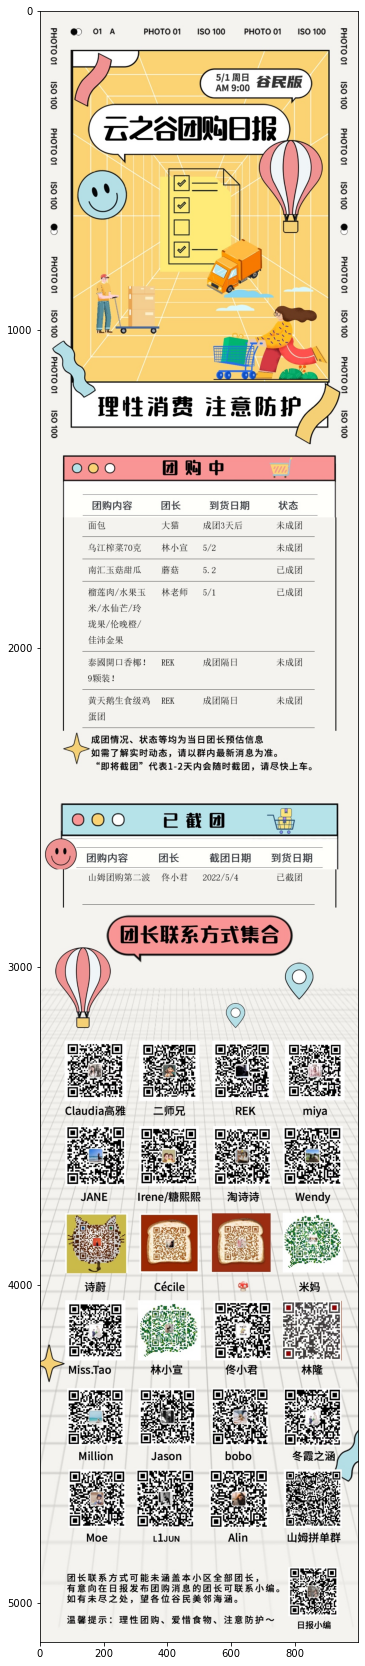

In [13]:
final_img = cv2.vconcat([head_temp, in_process_title_temp, in_process_img, complete_title_temp,complete_img, footer_temp])
plt.figure(figsize=(80,30))
plt.imshow(final_img)

In [14]:
cv2.imwrite(f"C:/Users/k-2fe/OneDrive/unicity_{today_str}.jpg", cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))

True